## Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/fb new sales data.csv")

In [3]:
df.sample(5)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale,date_year,date_month_no
595,596,2022-04-26,Cold coffee,Beverages,40,1,40,Online,Female,Night,2022,4
711,712,2022-12-17,Vadapav,Fastfood,20,3,60,Online,Female,Midnight,2022,12
650,651,2022-07-11,Sandwich,Fastfood,60,10,600,Online,Female,Midnight,2022,7
797,798,2022-05-22,Frankie,Fastfood,50,12,600,Others,Male,Night,2022,5
624,625,2022-06-17,Sandwich,Fastfood,60,15,900,Online,Male,Morning,2022,6


In [4]:
import sqlite3

In [5]:
# Create SQLite connection and save DataFrame to SQLite database
conn = sqlite3.connect('sample.db')
df.to_sql('fb_sales', conn, index=False, if_exists='replace')

# Function to execute SQL query and display results
def execute_query(query):
    result = pd.read_sql_query(query, conn)
    return result



## Exploratory Data Analysis




## Data Insights

1.Items in the dataset


In [6]:
unique_item_names = df['item_name'].unique()
print('Unique Item Names:')
for item_name in unique_item_names:
    print(item_name)

Unique Item Names:
Aalopuri
Vadapav
Sugarcane juice
Panipuri
Frankie
Sandwich
Cold coffee


2. Total sales analysis by Item name and year

In [7]:
query = ''' SELECT
    date_year,
    item_name,
    sum(quantity) AS total_sales_quantity,
    sum(transaction_amount) AS total_sales_amount
FROM
    fb_sales
GROUP BY
    date_year,
    item_name
ORDER BY
    date_year,
    total_sales_quantity DESC;'''
query_result = execute_query(query)
                                           # Convert the result into a DataFrame
new_data = pd.DataFrame(query_result)
new_data

,date_year,item_name,total_sales_quantity,total_sales_amount
0,2022,Cold coffee,974,38960
1,2022,Sugarcane juice,951,23775
2,2022,Panipuri,949,18980
3,2022,Aalopuri,821,16420
4,2022,Vadapav,769,15380
5,2022,Sandwich,756,45360
6,2022,Frankie,734,36700
7,2023,Frankie,416,20800
8,2023,Cold coffee,387,15480
9,2023,Sandwich,341,20460


<Axes: xlabel='total_sales_quantity', ylabel='item_name'>

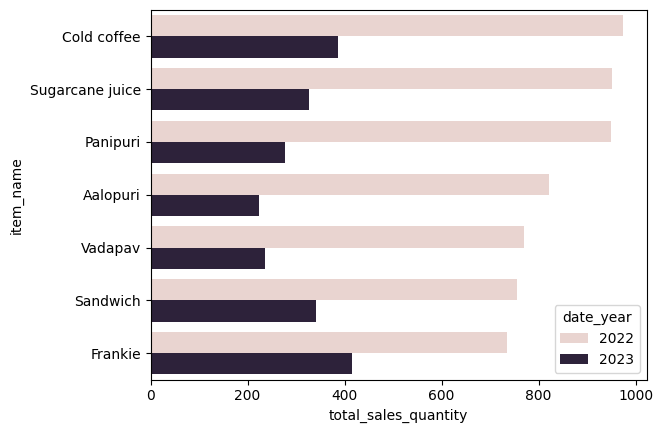

In [8]:
sns.barplot(x=new_data['total_sales_quantity'],y=new_data['item_name'],hue=new_data['date_year'] )

The sales are more in the year 2022 compare to 2023


3.Top Selling Items by time of sale

In [9]:
query='''SELECT item_name, time_of_sale,
       SUM(quantity) AS total_sales_quantity,
       SUM(transaction_amount) AS total_sales_amount

     FROM
        fb_sales
     GROUP BY
        time_of_sale,item_name
     ORDER BY
        time_of_sale,total_sales_quantity DESC;'''
query_result = execute_query(query)
new_data = pd.DataFrame(query_result)
new_data

,item_name,time_of_sale,total_sales_quantity,total_sales_amount
0,Cold coffee,Afternoon,337,13480
1,Sugarcane juice,Afternoon,325,8125
2,Frankie,Afternoon,238,11900
3,Panipuri,Afternoon,230,4600
4,Aalopuri,Afternoon,226,4520
5,Vadapav,Afternoon,194,3880
6,Sandwich,Afternoon,164,9840
7,Sugarcane juice,Evening,283,7075
8,Panipuri,Evening,241,4820
9,Frankie,Evening,240,12000


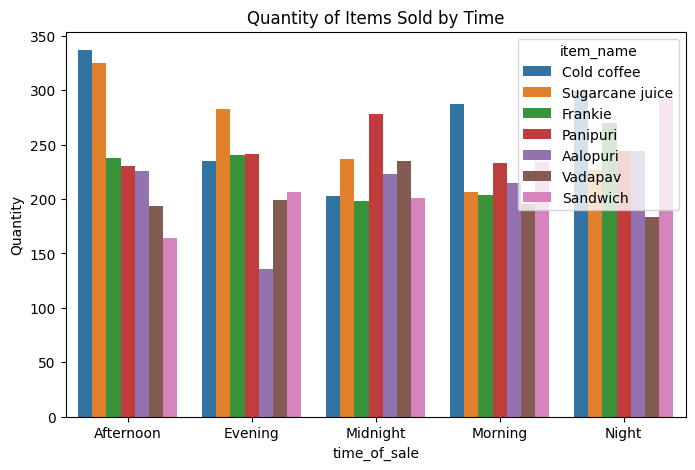

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(x='time_of_sale', y='total_sales_quantity', hue='item_name', data=new_data)
plt.xlabel('time_of_sale')
plt.ylabel('Quantity')
plt.title('Quantity of Items Sold by Time')
plt.show()

Cold coffee sales are higher during the afternoon and night

Sugarcane juice sales are higher during the afternoon

The Frankie sales are more during the night

The panipuri sales are more likely at midnight

The Aalopuri sales more during the night

The Vadapav sales are higher at midnight

The Sandwich sales are higher at night


4. Monthly sale orders trends for each item

In [11]:
query=''' SELECT item_name, date_month_no,
    COUNT(order_id) AS total_sales
FROM
    fb_sales
GROUP BY
    item_name,
   date_month_no
ORDER BY
    date_month_no,
    item_name;
'''
result_query = execute_query(query)
new_data =pd.DataFrame(result_query)
new_data

,item_name,date_month_no,total_sales
0,Aalopuri,1,10
1,Cold coffee,1,10
2,Frankie,1,17
3,Panipuri,1,17
4,Sandwich,1,14
...,...,...,...
79,Frankie,12,6
80,Panipuri,12,14
81,Sandwich,12,7
82,Sugarcane juice,12,16


5. Sales distribution by transaction type

In [12]:
query='''SELECT
    transaction_type,
    SUM(transaction_amount) AS total_sales_amount,
    COUNT(*) AS number_of_transactions
FROM fb_sales
GROUP BY transaction_type
ORDER BY total_sales_amount DESC;

'''

query_result=execute_query(query)
# Convert the result into a DataFram
new_data = pd.DataFrame(query_result)
new_data

,transaction_type,total_sales_amount,number_of_transactions
0,Cash,132840,476
1,Online,110595,417
2,Others,31795,107


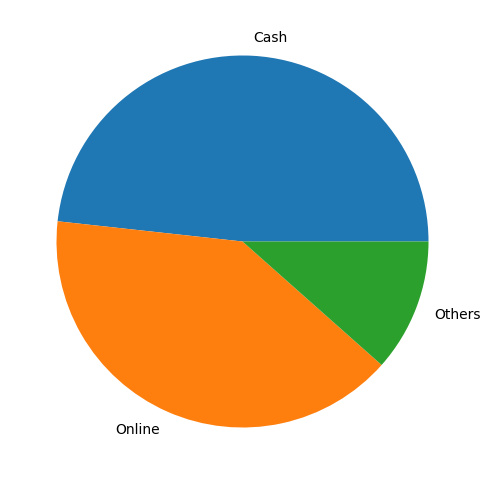

In [13]:
fig = plt.figure(figsize=(6, 7))
plt.pie(new_data['total_sales_amount'],labels=new_data['transaction_type'])
plt.show()

6. Customer purchase behavior analysis

In [14]:
query='''SELECT
    received_by AS customer_id,
    COUNT(DISTINCT order_id) AS num_orders,
    COUNT(DISTINCT date) AS total_days_purchased,
    SUM(transaction_amount) AS total_spent,
    AVG(transaction_amount) AS avg_transaction_amount,
    MAX(transaction_amount) AS max_transaction_amount,
    MIN(transaction_amount) AS min_transaction_amount
FROM fb_sales
GROUP BY customer_id
ORDER BY total_spent DESC;'''

result_query = execute_query(query)
new_data = pd.DataFrame(result_query)
new_data

,customer_id,num_orders,total_days_purchased,total_spent,avg_transaction_amount,max_transaction_amount,min_transaction_amount
0,Male,512,286,143440,280.156250,900,20
1,Female,488,277,131790,270.061475,900,20


7. Item Affinity Analysis (Items Often Purchased Together)

In [15]:
query='''SELECT
    t1.item_name AS item1,
    t2.item_name AS item2,
    COUNT(*) AS number_of_transactions
FROM fb_sales t1
JOIN fb_sales t2 ON t1.order_id = t2.order_id
WHERE t1.item_name < t2.item_name
GROUP BY item1, item2
ORDER BY number_of_transactions DESC;
'''

query_result=execute_query(query)
new_data = pd.DataFrame(query_result)
new_data

,item1,item2,number_of_transactions


No items are purchased together

8. Daily peak sales hours

In [16]:
query='''SELECT date, received_by,
    time_of_sale AS sale_hour,
    SUM(transaction_amount) AS total_sales_amount
FROM fb_sales
GROUP BY date, sale_hour
ORDER BY date, total_sales_amount DESC;'''

query_result=execute_query(query)
new_data = pd.DataFrame(query_result)
new_data


,date,received_by,sale_hour,total_sales_amount
0,2022-04-01,Female,Evening,420
1,2022-04-02,Male,Afternoon,900
2,2022-04-02,Male,Midnight,600
3,2022-04-03,Female,Night,220
4,2022-04-03,Female,Midnight,200
...,...,...,...,...
772,2023-03-27,Male,Night,360
773,2023-03-27,Male,Afternoon,120
774,2023-03-29,Male,Afternoon,560
775,2023-03-29,Male,Evening,520


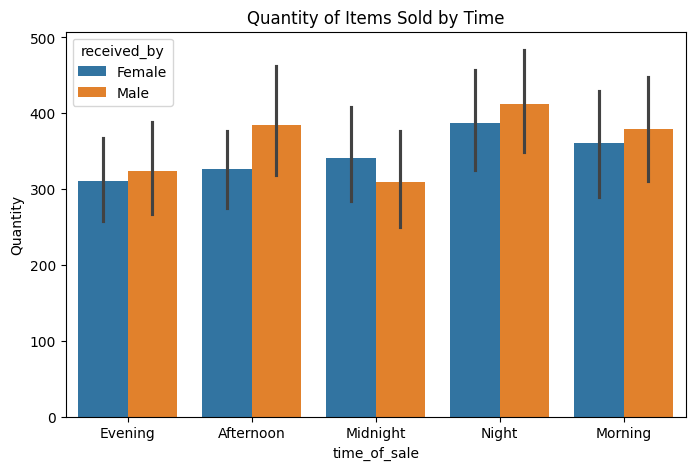

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='sale_hour', y='total_sales_amount', hue='received_by', data=new_data)
plt.xlabel('time_of_sale')
plt.ylabel('Quantity')
plt.title('Quantity of Items Sold by Time')
plt.show()

9.sales growth by time





In [18]:
query='''select date_month_no, sum(transaction_amount) as transaction_amount
From fb_sales
 Group by date_month_no
 Order by date_month_no;
'''

result_query=execute_query(query)
new_data=pd.DataFrame(result_query)
new_data

,date_month_no,transaction_amount
0,1,28670
1,2,25595
2,3,25390
3,4,17670
4,5,26570
5,6,17335
6,7,19490
7,8,22305
8,9,18640
9,10,27205


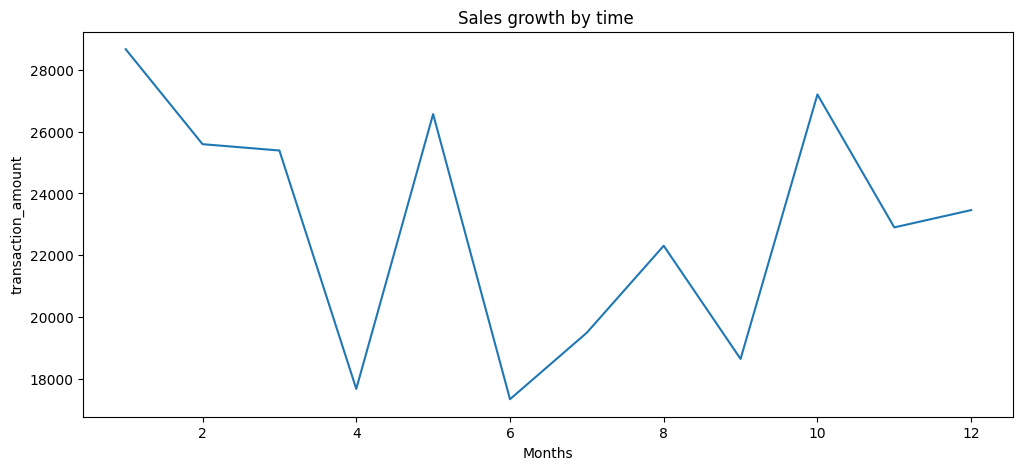

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(x="date_month_no", y="transaction_amount", data=new_data)
plt.xlabel('Months')
plt.title('Sales growth by time ')
plt.show()

10.comparsion of fastfood and beverages sales by year

In [20]:
query='''SELECT item_type ,
 sum(quantity) as total_sales_quantity, date_year,
 sum(transaction_amount) as total_sales_amount
FROM fb_sales
GROUP BY item_type ,date_year;'''

result_query=execute_query(query)
new_data=pd.DataFrame(result_query)
new_data

,item_type,total_sales_quantity,date_year,total_sales_amount
0,Beverages,1925,2022,62735
1,Beverages,714,2023,23655
2,Fastfood,4029,2022,132840
3,Fastfood,1494,2023,56000


Text(0, 0.5, 'Total Quantity Sold')

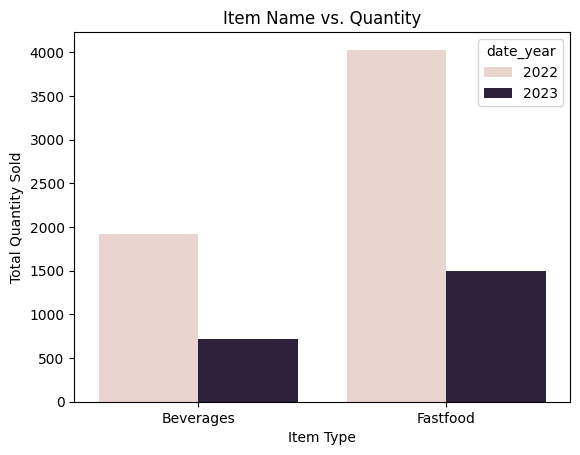

In [21]:
sns.barplot(x='item_type', y='total_sales_quantity', hue='date_year', data=new_data)
plt.title('Item Name vs. Quantity')
plt.xlabel('Item Type')
plt.ylabel('Total Quantity Sold')

11.Average Transaction Amount by Payment Type

In [22]:
query='''SELECT avg(transaction_amount) as avg_transaction_amount,transaction_type, date_year
FROM fb_sales
GROUP BY transaction_type , date_year;
'''

result_query=execute_query(query)
new_data=pd.DataFrame(result_query)
new_data

,avg_transaction_amount,transaction_type,date_year
0,263.828571,Cash,2022
1,321.428571,Cash,2023
2,255.141956,Online,2022
3,297.150000,Online,2023
4,282.974684,Others,2022
5,337.142857,Others,2023
